<a href="https://colab.research.google.com/github/PTC-Education/PTC-API-Playground/blob/main/User_Progress_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Script to Explore Trends with User Experience

This notebook explores trends that might give an indicator as to how a user changes their modeling process over time. The first draft shown here gets the most recent 100 documents from a user, then plots the ratio of parts in the document that have been renamed from their default.

# Set up Onshape

## Import Onshape Client

In [ ]:
!pip install onshape-client
from onshape_client.client import Client
from onshape_client.onshape_url import OnshapeElement
import json
base = 'https://cad.onshape.com' # change this if you're using a document in an enterprise (i.e. "https://ptc.onshape.com")

In [2]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  execfile(fn)

client = Client(configuration={"base_url": base,
                               "access_key": access,
                               "secret_key": secret})
print('client configured')

Saving colabkeys.py to colabkeys.py
client configured


## Get list of documents from user

In [ ]:
def documents(params = {}):
  fixed_url = '/api/documents'
  method = 'GET'

  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json',
            'Content-Type': 'application/json'}

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  # The command below prints the entire JSON response from Onshape
  # print(json.dumps(parsed, indent=4, sort_keys=True))
  return parsed
documents({'offset':20,'filter':1})

In [47]:
docs = documents({'filter':1})
docs2040 = documents({'offset':20,'filter':1})
docs4060 = documents({'offset':40,'filter':1})
docs6080 = documents({'offset':60,'filter':1})
docs80100 = documents({'offset':80,'filter':1})
for x in docs2040['items']:
  docs['items'].append(x)
for x in docs4060['items']:
  docs['items'].append(x)
for x in docs6080['items']:
  docs['items'].append(x)
for x in docs80100['items']:
  docs['items'].append(x)
print(len(docs['items']))

100


In [14]:
print(docs['items'][0]['name'])

Dashboard Test


In [48]:
import datetime

docDWidList = [] ## Document id and default workspace ID's added to 2D array
docCreatedAtList = []
docNameList = []
for x in docs['items']:
  docDWidList.append([x['id'],x['defaultWorkspace']['id']])
  docCreatedAtList.append(datetime.datetime.fromisoformat(x['createdAt']).date())
  docNameList.append(x['name'])

print(docIDList)
print(docCreatedAtList)
print(docNameList)

[['085516aadfae1895dbb885ad', '85f3ceb11457f3e7c9ca42f9'], ['858daab0db558d373e0c6826', '578503a63ef4485a84e1d411'], ['98e6db81e084e408079cea8a', '183bcbeaaecca9d25cc88e88'], ['728a62d9e3be6432c63f8be5', 'bc029fe7d89d4744868b20ad'], ['7fa7a496b5a242221e1f92af', 'cb8c2b3ae50af68cdbb86e2f'], ['79a0c95ae2ec99144ead217c', '9fbf7961f9e350e0c86e896a'], ['090026b075aa255ce3d59fc5', '14ccb2502def38da26b6bc2e'], ['c1d3a04e6d80c7ddff2c6fa1', 'cf939dd2aad844961b1dbb74'], ['44503b2fdb8162db597ad99b', '6337668d6f9ccc881828de1f'], ['1632778e06d6e463655f52bf', '6abfc818146374f46aaf0b67'], ['03a4028cac99759d95f3178f', '0deb55227976f4f797381cd2'], ['79e0302124211187343cae00', 'bbad3b38d11ee5372292b26f'], ['3d3e7e88cd86f936f2876de2', 'a7dc96a4f6f7699aead4612f'], ['e85907147ccfcd9d310c13e8', 'afa5ca5c2724780ca8646d45'], ['08894493e97ce9c4f5053830', '67a7e5d9690b21b2398dbd8f'], ['a9986db4def2e5c07d5b2442', '1d66515bf5ba99468795fe72'], ['ba7d0be0300134a64710bc1e', '65d5700ed95f1f3ee7aaebea'], ['df38147c324

## Get elements list for each document

In [49]:
def documentElements(did,wid):
  fixed_url = '/api/documents/d/did/w/wid/elements'
  method = 'GET'

  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json',
            'Content-Type': 'application/json'}
  
  fixed_url = fixed_url.replace('did', did)
  fixed_url = fixed_url.replace('wid', wid)

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  # The command below prints the entire JSON response from Onshape
  # print(json.dumps(parsed, indent=4, sort_keys=True))
  return parsed

In [50]:
PartStudioIDList = []
AssemblyIDList = []
for x in docDWidList:
  elements = documentElements(x[0],x[1])
  for y in elements:
    if y['elementType'] == "PARTSTUDIO":
      PartStudioIDList.append([x[0],x[1],y['id']])
    if y['elementType'] == "ASSEMBLY":
      AssemblyIDList.append([x[0],x[1],y['id']])

print(PartStudioIDList)
print(AssemblyIDList)

[['085516aadfae1895dbb885ad', '85f3ceb11457f3e7c9ca42f9', 'c13289731f3873dfb45b47a1'], ['858daab0db558d373e0c6826', '578503a63ef4485a84e1d411', 'c13c2d5fcb6f3d4ba3e17939'], ['98e6db81e084e408079cea8a', '183bcbeaaecca9d25cc88e88', '72af76e1128604b6635d3719'], ['728a62d9e3be6432c63f8be5', 'bc029fe7d89d4744868b20ad', '5d569d090af62695f4fbcb00'], ['7fa7a496b5a242221e1f92af', 'cb8c2b3ae50af68cdbb86e2f', 'f2429531683ec5a38a104be6'], ['7fa7a496b5a242221e1f92af', 'cb8c2b3ae50af68cdbb86e2f', '417260def048ff88802bf87c'], ['79a0c95ae2ec99144ead217c', '9fbf7961f9e350e0c86e896a', '24499271082c87f3c6a08f2b'], ['090026b075aa255ce3d59fc5', '14ccb2502def38da26b6bc2e', 'a502410f148761254070b03f'], ['c1d3a04e6d80c7ddff2c6fa1', 'cf939dd2aad844961b1dbb74', '14ba41888859669b88f7aed2'], ['44503b2fdb8162db597ad99b', '6337668d6f9ccc881828de1f', 'e090f832c9f64d32383db6f2'], ['44503b2fdb8162db597ad99b', '6337668d6f9ccc881828de1f', '0a6941c81e1565cabc9a258a'], ['44503b2fdb8162db597ad99b', '6337668d6f9ccc881828de1

# Part Studio Analysis

## Feature List Analysis

In [62]:
def getFeatureList(did,wid,eid):
  fixed_url = '/api/partstudios/d/did/w/wid/e/eid/features'

  fixed_url = fixed_url.replace('did', did)
  fixed_url = fixed_url.replace('wid', wid)
  fixed_url = fixed_url.replace('eid', eid)

  method = 'GET'
  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
            'Content-Type': 'application/json'}

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)
  parsed = json.loads(response.data)
  # The command below prints the entire JSON response from Onshape
  # print(json.dumps(parsed, indent=4, sort_keys=True))
  return parsed

In [ ]:
getFeatureList(PartStudioIDList[1][0],PartStudioIDList[1][1],PartStudioIDList[1][2])

In [ ]:
for x in PartStudioIDList:
  featureList = getFeatureList[x[0],x[1],x[2]]

## Part Name Analysis


In [ ]:
def getPartList(did,wid):
  fixed_url = '/api/parts/d/did/w/wid'

  # Method below specifies the request type - 'GET' or 'POST'
  method = 'GET'

  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
            'Content-Type': 'application/json'}

  fixed_url = fixed_url.replace('did', did)
  fixed_url = fixed_url.replace('wid', wid)
  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  # The command below prints the entire JSON response from Onshape
  parsed = json.loads(response.data)
  # print(json.dumps(parsed, indent=4, sort_keys=True))
  return parsed

getPartList(docDWidList[1][0],docDWidList[1][1])

In [52]:
renamedPartsRatio = []
for x in docDWidList:
  parts = getPartList(x[0],x[1])
  defaultNames = 0
  descriptiveNames = 0
  if len(parts) == 0:
    renamedPartsRatio.append(float('NaN'))
  else:
    for y in parts:
      if "Part" in y['name']:
        defaultNames += 1
      else:
        descriptiveNames += 1
    renamedPartsRatio.append(descriptiveNames/len(parts))


In [53]:
print(renamedPartsRatio)

[nan, 0.0, nan, nan, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.2222222222222222, 0.16666666666666666, 1.0, 1.0, 0.0, 1.0, 0.0, nan, 0.9957356076759062, 0.0, 0.0, nan, 0.0, nan, nan, 1.0, 0.0, 1.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, 1.0, 1.0, 0.2, 0.0, 0.0, 0.9202898550724637, 0.27444444444444444, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 1.0, 0.0, 0.0, nan, 1.0, 0.0, 1.0, 0.3333333333333333, 0.5, 0.0, 1.0, 0.9935897435897436, 0.4, 0.0, 0.0, nan, 1.0, 1.0, 0.0, nan, 0.0, 0.0, 0.0, 1.0, 0.509090909090909, 1.0]


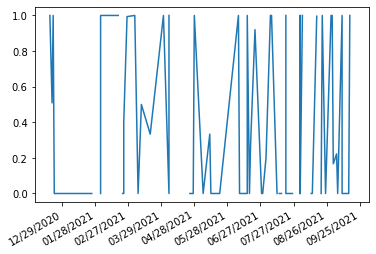

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.plot(docCreatedAtList,renamedPartsRatio)
plt.gcf().autofmt_xdate()